## Task 1: Importování balíčků a načítání dat

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
filename = input('Zadejte soubor: ')
# filename = 'summary.csv'
df = pd.read_csv(filename)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Task 2: Spracování dat

### Task 2.1: Sloučit data za období 12ti měsíců

In [3]:
frames = []
all_length = []
for file in os.listdir('data/'):
    if file.endswith('.csv'):
        filepath = 'data/' + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        # length_1month = len(df1.index)
        # all_length.append(length_1month)

result.to_csv('summary.csv', index=False)

### Task 2.2: Přidat sloupec 'Month'

In [4]:
df['Month'] = df['Order Date'].str[0:2]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01


### Task 2.3: Odstranit hodnoty 'NaN' a 'Or'

In [5]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01


## Task 3: Reporting

### Task 3.1: V jakém měsíci se toho prodalo nejvíc? A jaká byla hodnota?

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

Nejvyšší hodnota: 4613443.5 USD

Graph


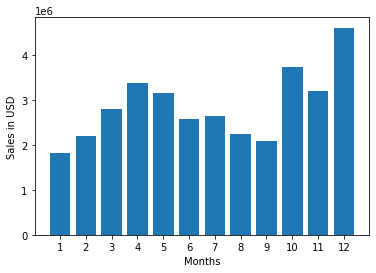

In [12]:
salesValue = df.groupby('Month').sum()['Sales']
print(df.groupby('Month').sum()['Sales'])
print()
print('Nejvyšší hodnota: ' + str(salesValue.max()) + ' USD') 
print()
print("Graph")
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=salesValue)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: Které město mělo nejlepší tržby?

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


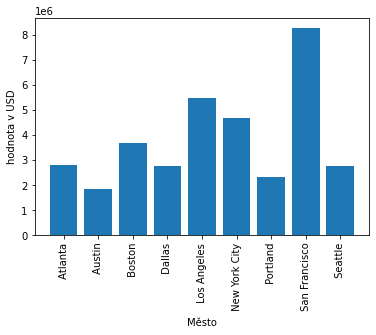

In [29]:
cityAddress = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(cityAddress)

print(df.groupby('City').sum()['Sales'])

salesCityValue = df.groupby('City').sum()['Sales']
cities = [city for city, sales in salesCityValue.items()]
plt.bar(x=cities, height=salesCityValue)
plt.xticks(cities, rotation=90, size=10)
plt.xlabel('Město')
plt.ylabel('hodnota v USD')
plt.show()

### Task 3.3: V kolik hodin bychom měli zobrazovat reklamy, abychom maximalizovali pravděpodobnost, že zákazník koupí produkt?

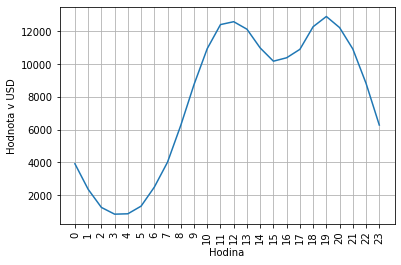

In [30]:
orderDate = pd.to_datetime(df['Order Date'])
df['Hours'] = orderDate.dt.hour
salesHoursValue = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in salesHoursValue.items()]
plt.plot(hours, salesHoursValue)
plt.grid()
plt.xticks(hours, rotation=90, size=10)
plt.xlabel('Hodina')
plt.ylabel('Hodnota v USD')
plt.show()

### Task 3.4: Jaké produkty se nejčastěji prodávají společně?

In [31]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

C:\Users\david\AppData\Local\Temp\ipykernel_5972\427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

### Task 3.5: Jaký produkt se nejvíce prodával?

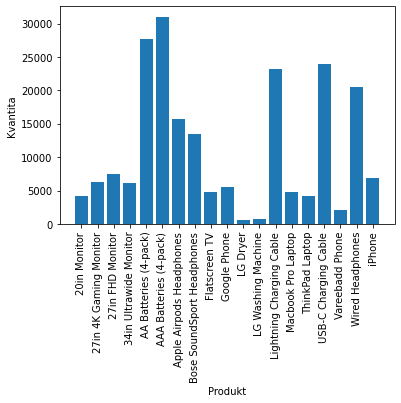

In [34]:
all_products = df.groupby('Product').sum()['Quantity Ordered']

product_ls = [product for product, quant in all_products.items()]
plt.bar(product_ls, all_products)
plt.xticks(product_ls, rotation=90, size=10)
plt.xlabel('Produkt')
plt.ylabel('Kvantita')
plt.show()